In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

Now we will combine 12 months of data into one single dataframe.

In [3]:
files = [f for f in os.listdir('csv/raw')]

In [4]:
all_months_data = pd.DataFrame()

for t in files:
    df = pd.read_csv('csv/raw/'+t)
    all_months_data = pd.concat([all_months_data,df])

In [5]:
all_months_data.to_csv('csv/combined_data.csv',index=False)

In [6]:
all_months = all_months_data.copy()

In [7]:
all_months.shape

(186850, 6)

In [8]:
print(f'Number of rows : {all_months.shape[0]}')
print(f'Number of columns : {all_months.shape[1]}')
print(f'Columns : {list(all_months.columns)}')

Number of rows : 186850
Number of columns : 6
Columns : ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']


In [9]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


Now we will check the null values in our dataset.

In [11]:
nan_df = all_months[all_months.isna().any(axis=1)]

In [12]:
nan_df.shape

(545, 6)

We have 545 null rows, which is approximately 0.3% of the total rows and so we can drop these rows.

In [13]:
all_months = all_months.dropna(how='all')

Now we will convert the Order Date column which is an object to datetime.

In [14]:
all_months['Order Date'] = pd.to_datetime(all_months['Order Date'])

ParserError: Unknown string format: Order Date

We get an error as the column also contains some strings. This is because while combining the csv files, we also combine the Column headers for each file. The unwanted string starts from 'Or', so we drop these rows.

In [15]:
all_months = all_months[all_months['Order Date'].str[0:2] != 'Or']

In [16]:
all_months['Order Date'] = pd.to_datetime(all_months['Order Date'])

In [17]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


We can extract the day of the week, month and hour of the sale from the 'Order Date' column for analysis.

In [18]:
all_months['month'] = all_months['Order Date'].dt.month

In [19]:
all_months['day'] = all_months['Order Date'].dt.dayofweek

In [20]:
all_months['hour'] = all_months['Order Date'].dt.hour

In [21]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 17660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   day               185950 non-null  int64         
 8   hour              185950 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 14.2+ MB


Converting the other columns to appropriate formats.

In [22]:
all_months['Order ID'] = all_months['Order ID'].astype('int')

In [23]:
all_months['Quantity Ordered'] = all_months['Quantity Ordered'].astype('int')

In [24]:
all_months['Price Each'] = all_months['Price Each'].astype('float')

Now we will extract some additional features from the Purchase Address columns.

In [25]:
all_months['state'] = all_months['Purchase Address'].str.extract(' ([A-Z]{2}) ')

In [26]:
all_months['zipc'] = all_months['Purchase Address'].str.extract('(\d{5})$')

In [27]:
all_months['zipc'] = all_months['zipc'].astype('int')

In [28]:
all_months['city'] = all_months['Purchase Address'].str.extract(', (\D+), [A-Z]{2} \d{5}')

In [29]:
all_months['address'] = all_months['city'] + ' ' + '(' + all_months['state'] + ')' # creating additional column as we can have cities with same names.

Creating a total sales amount column.

In [30]:
all_months['total'] = all_months['Quantity Ordered'] * all_months['Price Each']

In [31]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 17660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   day               185950 non-null  int64         
 8   hour              185950 non-null  int64         
 9   state             185950 non-null  object        
 10  zipc              185950 non-null  int64         
 11  city              185950 non-null  object        
 12  address           185950 non-null  object        
 13  total             185950 non-null  float64       
dtypes: da

In [32]:
all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,day,hour,state,zipc,city,address,total
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,3,17,NY,10001,New York City,New York City (NY),11.99
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,6,14,TX,75001,Dallas,Dallas (TX),3.84
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,4,11,NY,10001,New York City,New York City (NY),149.99
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,3,20,TX,75001,Dallas,Dallas (TX),11.99
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5,22,WA,98101,Seattle,Seattle (WA),5.98


In [33]:
all_months=all_months[['Order ID','Product','Quantity Ordered','Price Each','total','Order Date','month','day','hour','Purchase Address','state','zipc','city','address']]

In [34]:
all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,total,Order Date,month,day,hour,Purchase Address,state,zipc,city,address
0,194095,Wired Headphones,1,11.99,11.99,2019-05-16 17:14:00,5,3,17,"669 2nd St, New York City, NY 10001",NY,10001,New York City,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,3.84,2019-05-19 14:43:00,5,6,14,"844 Walnut St, Dallas, TX 75001",TX,75001,Dallas,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,149.99,2019-05-24 11:36:00,5,4,11,"164 Madison St, New York City, NY 10001",NY,10001,New York City,New York City (NY)
3,194098,Wired Headphones,1,11.99,11.99,2019-05-02 20:40:00,5,3,20,"622 Meadow St, Dallas, TX 75001",TX,75001,Dallas,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,5.98,2019-05-11 22:55:00,5,5,22,"17 Church St, Seattle, WA 98101",WA,98101,Seattle,Seattle (WA)


Now we will answer 5 business questions.

1. What were the best months for sales? How much was earned in those month?

In [35]:
monthly_sales = all_months.groupby('month').sum()['total']

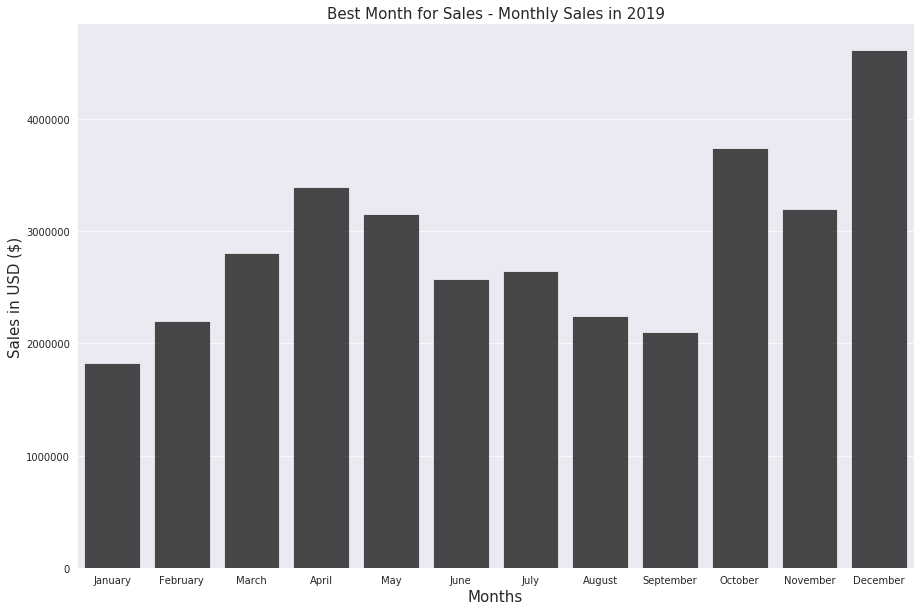

In [37]:
m = ["January","February","March","April","May","June","July","August","September","October","November","December"]
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (15,10))
    ax = sns.barplot(x=m, y=monthly_sales, color='#000000',alpha=0.7)
    plt.xlabel('Months', fontsize=15)
    plt.ylabel('Sales in USD ($)', fontsize=15)
    plt.title('Best Month for Sales - Monthly Sales in 2019', fontsize=15)
    sns.despine()
    plt.savefig('plots/month.png')

2. What city had the best sales?

In [38]:
all_months['address'].value_counts()

San Francisco (CA)    44732
Los Angeles (CA)      29605
New York City (NY)    24876
Boston (MA)           19934
Atlanta (GA)          14881
Dallas (TX)           14820
Seattle (WA)          14732
Portland (OR)         10010
Austin (TX)            9905
Portland (ME)          2455
Name: address, dtype: int64

In [39]:
city_sales = all_months.groupby(['address']).sum()['total']

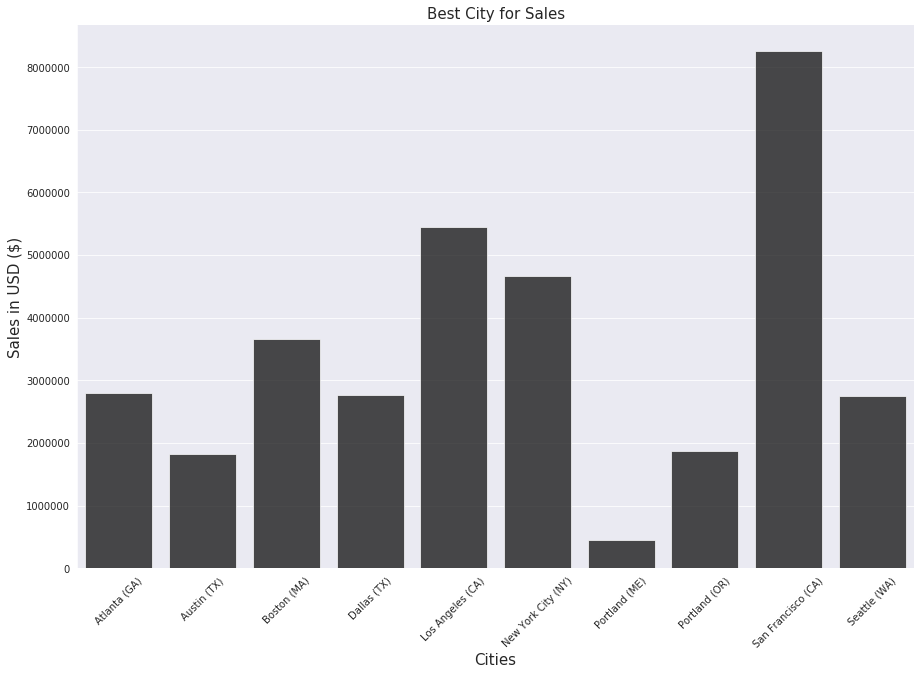

In [40]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (15,10))
    ax = sns.barplot(x=city_sales.index, y=city_sales, color='#000000',alpha=0.7)
    plt.xlabel('Cities', fontsize=15)
    plt.ylabel('Sales in USD ($)', fontsize=15)
    plt.title('Best City for Sales', fontsize=15)
    sns.despine()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.savefig('plots/city.png')

3. What time should we display advertisements to maximize the likelihood of customers buying the product? ( Best Time for Sales )

In [41]:
hourly_sales = all_months.groupby(['hour']).count()

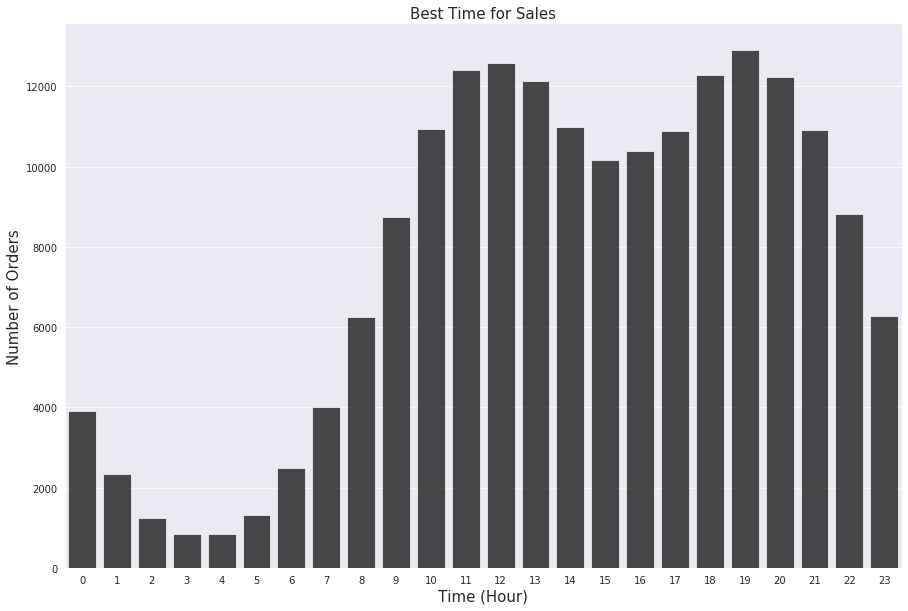

In [42]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (15,10))
    ax = sns.barplot(x=hourly_sales.index, y=hourly_sales['Order ID'], color='#000000',alpha=0.7)
    plt.xlabel('Time (Hour)', fontsize=15)
    plt.ylabel('Number of Orders', fontsize=15)
    plt.title('Best Time for Sales', fontsize=15)
    sns.despine()
    plt.savefig('plots/hour.png')

Recommendation - Best Time for Sales : 12 pm (12) and 7 pm (19)

4. What products are most often sold together?

In [43]:
dup_id = all_months[all_months['Order ID'].duplicated(keep=False)]

In [44]:
dup_id['Combined'] = dup_id.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [45]:
dup_id = dup_id[['Order ID','Combined']].drop_duplicates()

In [46]:
from itertools import combinations
from collections import Counter

In [47]:
count = Counter()

for row in dup_id['Combined']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

most_common_2 = count.most_common(10)

In [48]:
print('\n')
for k,v in most_common_2:
    print(f'{k[0]} and {k[1]} - {v} times\n')



iPhone and Lightning Charging Cable - 1005 times

Google Phone and USB-C Charging Cable - 987 times

iPhone and Wired Headphones - 447 times

Google Phone and Wired Headphones - 414 times

Vareebadd Phone and USB-C Charging Cable - 361 times

iPhone and Apple Airpods Headphones - 360 times

Google Phone and Bose SoundSport Headphones - 220 times

USB-C Charging Cable and Wired Headphones - 160 times

Vareebadd Phone and Wired Headphones - 143 times

Lightning Charging Cable and Wired Headphones - 92 times



5. Which products sold the most? Why?

In [49]:
most_common = all_months.groupby(['Product'])['Quantity Ordered'].sum()

In [50]:
most_common.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

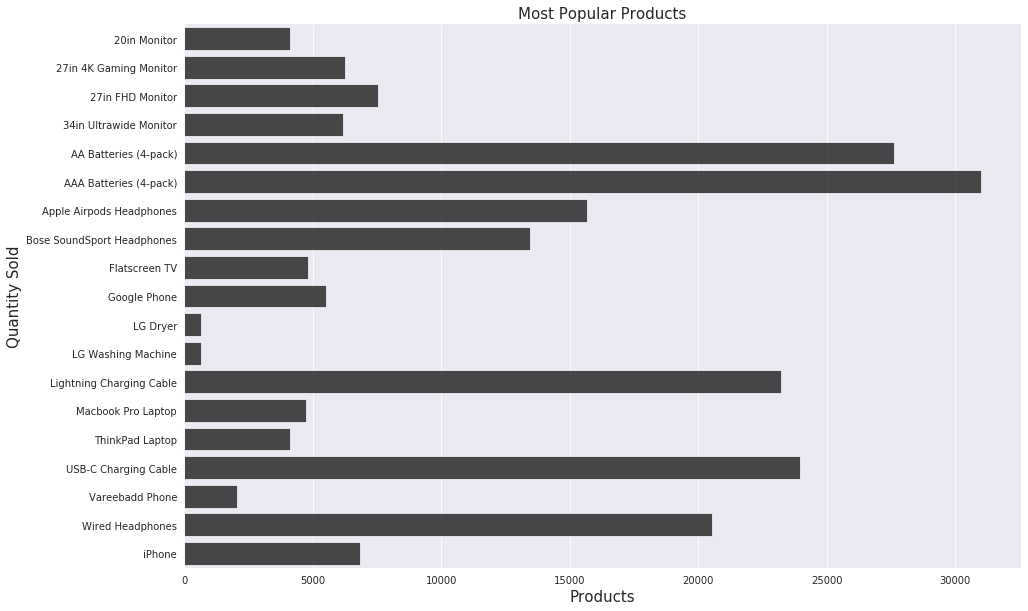

In [51]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (15,10))
    ax = sns.barplot(x=most_common, y=most_common.index, color='#000000',alpha=0.7,orient='h')
    plt.xlabel('Products', fontsize=15)
    plt.ylabel('Quantity Sold', fontsize=15)
    plt.title('Most Popular Products', fontsize=15)
    sns.despine()
    plt.savefig('plots/product.png')